# Titanic Data Analysis
### Author: Utsav Shah

# Contents

Overview
1. Importing all the libraries necessary for this project
2. Load Data from CSVs
3. Fixing NaN data values
    1. Explanation: Why median is considered ro replace NaN values in column "Age"?
4. Data Analysis
    1. Percentage Deaths and Survivors
    2. Female - Male -- Deaths and Survivors
    3. Age of Passengers
    4. Number of Passengers Traveling with their Sibling/Spouse
    5. Number of Passengers traveling with their Parents/Children
    6. Number of Passengers Traveling in Different Socio-Economic Classes
    7. Number of Passengers Traveling in Class 1, 2, 3 - Deaths and Survivors
    8. Distribution of Pclass and Cabin
    9. Box Plot of Survivors from Pclass 1, 2 nad 3
    10. Distribution of Survivors with respect to Embarkment
    11. Number of Passengers that Died and Survived with respect to the Fare
    12. Distribution of Deck (Cabin) and Survived
5. Prediction Algorithms
    1. Make data appropriate for Training and Testing
    2. Splitting up data into 80% train data and 20% test data
    3. Random Forest Classification Algorithm - Implementation and Results
    4. Linear Discrimination Analysis - Implementation and Results
6. Further Research
7. Conclusion

## Overview

This study is an exercise to show how to use foundations of Data Science in order to import, study, visualize, and present the raw data in a method that is easy for any user to digest and understand.

This study uses passenger data from the ill-fated maiden voyage of the RMS Titanic (1912). The data (and explanation of the data) can be obtained from: https://www.kaggle.com/c/titanic/data

First, the raw comma separated values (.cvs) data will be loaded into a Python (NumPy) series.

Second, there will be some data exploration. This will be completed mostly by loading plots of different data slices in order to better understand the data with visualization. Visualizing the data makes generating a hypothesis easier.

Third, the data will be analyzed.

Lastly, a prediction model using two algorithms is used to predict how accurate the models work on the titanic dataset and a confusion matrix is plot to clearly see the obtained results. This model has been created to see the chances of surviving the Titanic disaster.

Note: 

This is a Jupyter iPython Notebook. It allows code to be written, code output to be displayed, and also markup. It allows the analysis to be conducted and displayed. Comments that are intended for a general audience are presented in markup 'plain' text below each code segment. Comments that have to do with how the code works are above the code with a leading hashtag(#). However, due to the heavy display of Python code; it is not suitable for all audiences. For example, if I were presenting my analysis to upper management, board of directors, a general audience, etc. I would not use this Notebook. I'd have much of the output in a PowerPoint type presentation. However, I would have the Jupyter Notebook available as a supplement, in case anyone wanted to see the code. Or, more importantly, the amount of work it took to create the pretty graphics.

The data has been split into two groups:

training set (train.csv)
test set (test.csv)
The training set should be used to build your machine learning models. For the training set, we provide the outcome (also known as the “ground truth”) for each passenger. Your model will be based on “features” like passengers’ gender and class. You can also use feature engineering to create new features.

The test set should be used to see how well your model performs on unseen data. For the test set, we do not provide the ground truth for each passenger. It is your job to predict these outcomes. For each passenger in the test set, use the model you trained to predict whether or not they survived the sinking of the Titanic.

Data Dictionary

* Variable	Definition	Key
* survival	Survival	0 = No, 1 = Yes
* pclass	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd
* sex	Sex	
* Age	Age in years	
* sibsp	# of siblings / spouses aboard the Titanic	
* parch	# of parents / children aboard the Titanic	
* ticket	Ticket number	
* fare	Passenger fare	
* cabin	Cabin number	
* embarked	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton

Variable Notes

pclass: A proxy for socio-economic status (SES)
* 1st = Upper
* 2nd = Middle
* 3rd = Lower

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations in this way...
* Sibling = brother, sister, stepbrother, stepsister
* Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way...
* Parent = mother, father
( Child = daughter, son, stepdaughter, stepson
* Some children travelled only with a nanny, therefore parch=0 for them.

## 1] Importing all the libraries necessary for this project

In [1]:
import numpy as np # linear algebra 
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv) 
import os 
import gc 
import matplotlib.pyplot as plt 
import seaborn as sns
import math
import sklearn
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

## 2]  Load Data from CSVs

In [2]:
# Creating the INPUT FOLDER which will contain our input files!
INPUT_FOLDER='/Users/Utsav/Projects/Udacity DAND/titanic-data-analysis/'
print ('File Sizes:')
for f in os.listdir(INPUT_FOLDER):
   if 'zip' not in f:
      print (f.ljust(30) + str(round(os.path.getsize(INPUT_FOLDER +  f) / 1000, 2)) + ' KB')

File Sizes:
.DS_Store                     8.2 KB
.ipynb_checkpoints            0.27 KB
references-utsav.txt          0.36 KB
titanic-data-analysis-Copy1.ipynb825.15 KB
titanic-data-analysis-final.ipynb816.69 KB
titanic-data-analysis-utsav-final.html1341.59 KB
titanic-data-analysis-utsav-final.ipynb1058.76 KB
titanic-data-analysis-utsav-postreview1-2.html1343.89 KB
titanic-data-analysis-utsav-postreview1.html1344.19 KB
titanic-data-analysis-utsav-postreview1.ipynb1061.01 KB
titanic-data-analysis-utsav-postreview2.ipynb1047.14 KB
titanic-data-analysis-utsav.html1108.34 KB
titanic-data-analysis-utsav.ipynb1061.01 KB
titanic-data-analysis.ipynb   818.79 KB
titanic_train.csv             61.19 KB


In [3]:
main_file = pd.read_csv(INPUT_FOLDER + 'titanic_train.csv')

In [4]:
# Head of the dataset
main_file.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
# Description of the main_file
main_file.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
# Check the 
main_file.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## 3] Fixing NaN data values

In [7]:
# Find length of NaN values in Age
len(np.argwhere(np.isnan(main_file["Age"])))

177

In [8]:
# Find length of the column "Age"
len(main_file["Age"])

891

In [9]:
# View the NaN in Age for Female-Sex
female_age = main_file[main_file["Sex"] == "female"]["Age"]

In [10]:
female_age.tail()

880    25.0
882    22.0
885    39.0
887    19.0
888     NaN
Name: Age, dtype: float64

In [11]:
# View the NaN in Age for Male-Sex
male_age = main_file[main_file["Sex"] == "male"]["Age"] 

In [12]:
male_age.head()

0    22.0
4    35.0
5     NaN
6    54.0
7     2.0
Name: Age, dtype: float64

In [13]:
# Store median value into variable
female_median = female_age.median()
male_median = male_age.median()

In [14]:
# Assign age and sex into lists
age = list(main_file["Age"])
sex = list(main_file["Sex"])

In [15]:
# Run loop to replace the NaN values with the median value of the column
# The NaN values in female ages are replaced by the median of the female ages
# The NaN values in male ages are replaced by the median of the male ages

for i in range (len(age)):
    if (math.isnan(age[i]) and sex[i] == "male"):
        age[i] = male_median
        
    elif (math.isnan(age[i]) and sex[i] == "female"):
        age[i] = female_median

In [16]:
# Replace the Age and Sex columns with new updated ones without NaNs
(main_file["Age"]) = age
(main_file["Sex"]) = sex

In [17]:
# View the updated Age of female-Sex
main_file[main_file["Sex"] == "female"]["Age"].tail()

880    25.0
882    22.0
885    39.0
887    19.0
888    27.0
Name: Age, dtype: float64

In [18]:
# View the updated Age of male-Sex
main_file[main_file["Sex"] == "male"]["Age"].head()

0    22.0
4    35.0
5    29.0
6    54.0
7     2.0
Name: Age, dtype: float64

### A] Explanation: Why median is considered ro replace NaN values in column "Age"?

177 values out of 891 values are missing or NaN fot the column "Age".

That is almost 20% of the values that are missing or NaN.

This percentage is not small but it's rather not too big either. 

The NaN values have been replaced with the median of the age values present in the column. 
This is one of the ways to handle missing-at-random data, although note that it gives a different answer.

Replacing the NaN values with the median seems justfifiable as 20% is not too large nor too small.
Also, the median age for male and median age for female have seperately be found and replaced keeping Sex in mind. This is definitely better than replacing the all the NaN values by one single value of median of all present ages.

The NaN values are not replaced by the mode as 20% could be a lot to replace by the most occuring value and this might not do justice to the column Age. 

## 4] Data Analysis

### A] Percentage Deaths and Survivors

This section shows a bar graph and a pie chart of the percentage of deaths and survivors of the passengers on titanic.

In [19]:
# Total number of passengers
no_of_passengers = main_file.groupby("Survived").size()

In [20]:
no_of_passengers

Survived
0    549
1    342
dtype: int64

In [21]:
# Total number of survivors
no_of_survivors = no_of_passengers[1]

In [22]:
no_of_survivors

342

In [23]:
# Total number of deaths
no_of_deaths = no_of_passengers[0]

In [24]:
no_of_deaths

549

In [25]:
# Percentage of total survivors and deaths
percent_of_survivors = (no_of_survivors/(no_of_survivors + no_of_deaths))*100
percent_of_deaths = (no_of_deaths/(no_of_survivors + no_of_deaths))*100

In [26]:
percent_of_survivors

38.383838383838381

In [27]:
percent_of_deaths

61.616161616161612

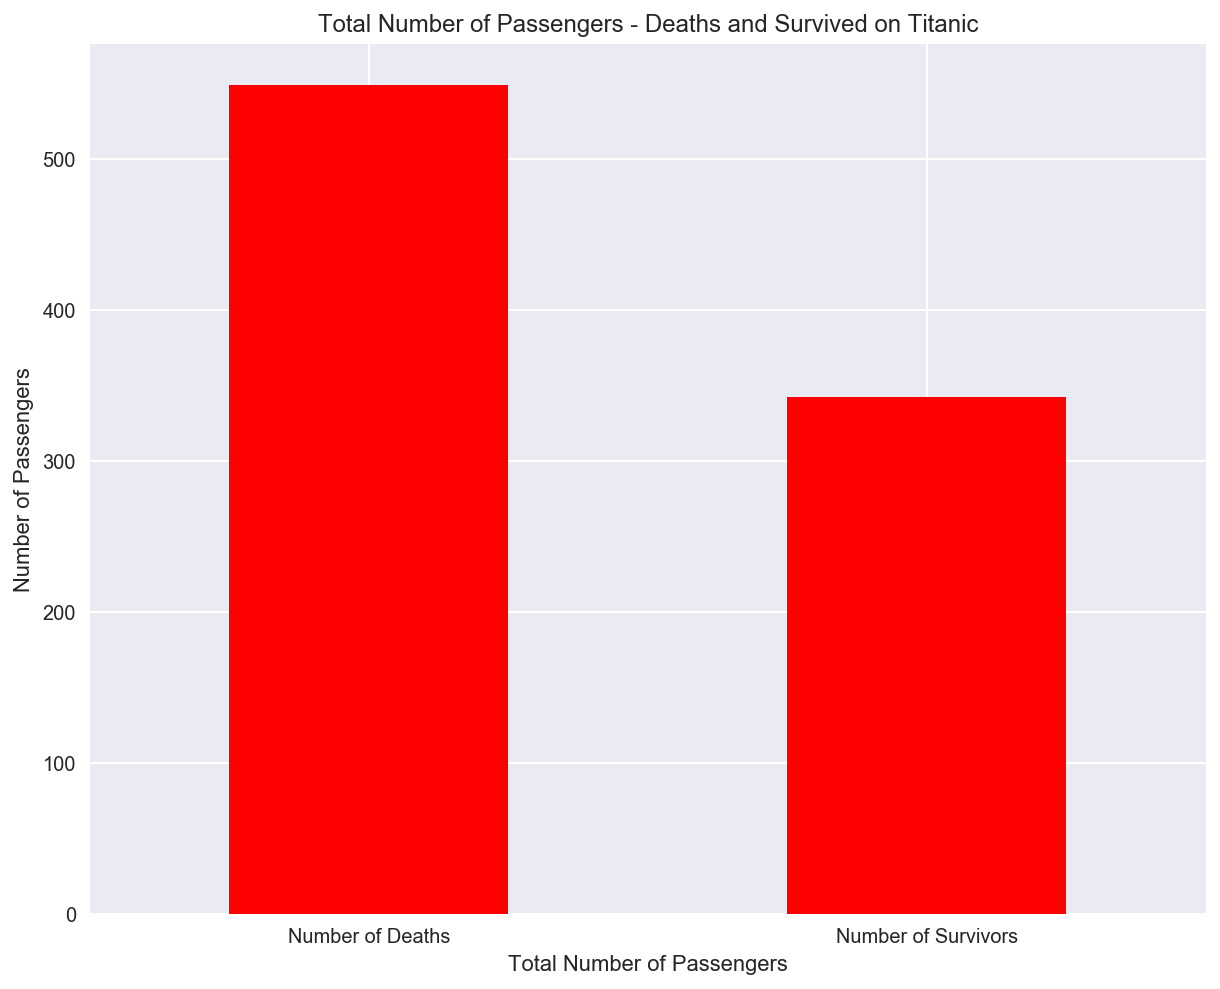

In [28]:
# Plot bar graph for Total Number of Passengers - Deaths and Survived

objects = ('Number of Deaths', 'Number of Survivors')
bars = np.arange(len(objects))
no_of_passengers.plot(kind = "bar", figsize = (10,8), color = 'r')
plt.xticks(bars, objects, rotation='horizontal')
plt.ylabel("Number of Passengers")
plt.xlabel("Total Number of Passengers")
plt.title("Total Number of Passengers - Deaths and Survived on Titanic")
plt.show()

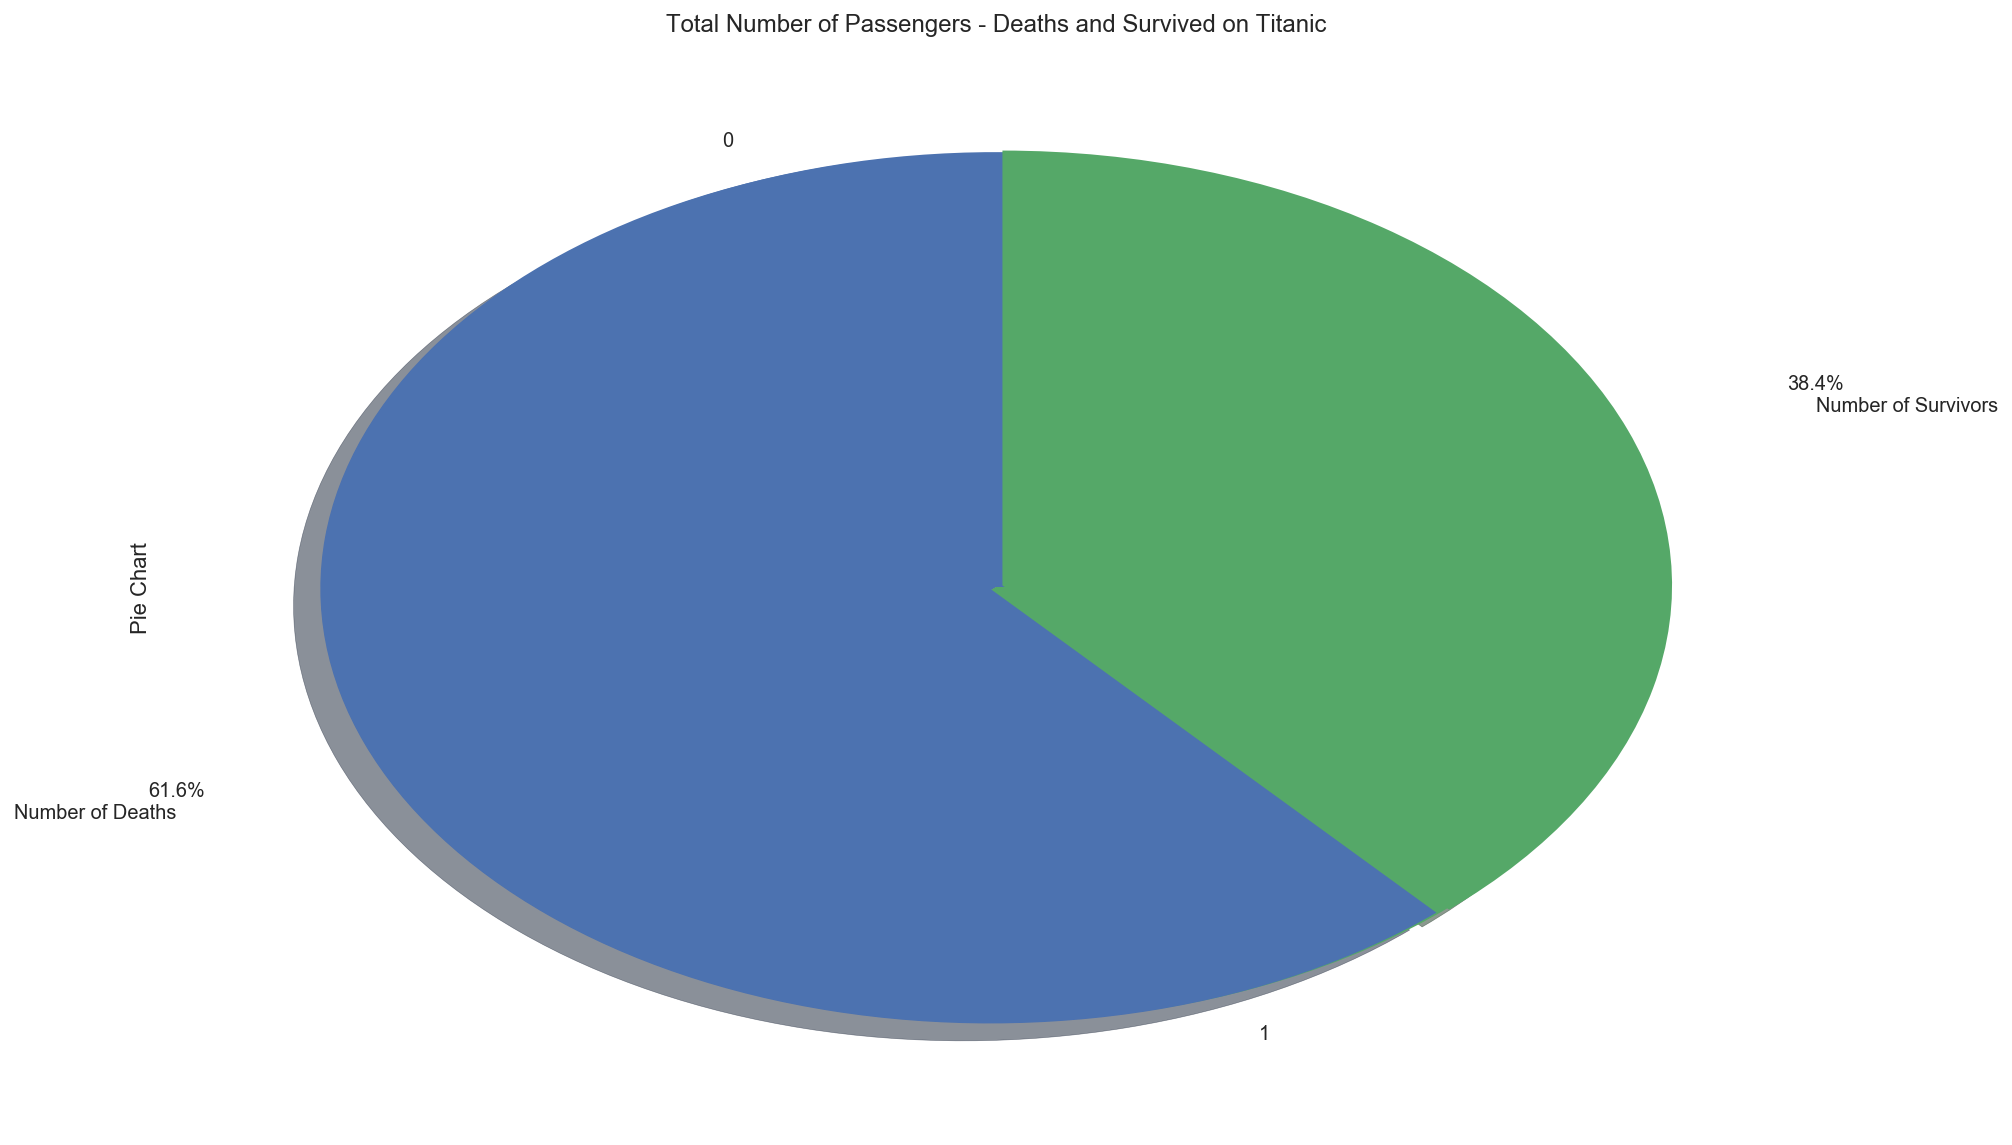

In [29]:
# Plot pie chart for Total Number of Passenger Deaths and Survived

no_of_passengers.plot(kind = "pie", figsize=(15,10))
labels = '\n\nNumber of Deaths', '\n\nNumber of Survivors'
explode = (0.01, 0.01)
plt.pie(no_of_passengers, autopct='%1.1f%%', pctdistance=1.3, labeldistance=1.3, explode=explode, labels=labels,
        shadow=True, startangle=90)
plt.title("Total Number of Passengers - Deaths and Survived on Titanic")
plt.ylabel("Pie Chart")
plt.show()

### Analysis - 
It can be analyzed that 

Total Percentage of Number of Deaths = 61.61%

Total Percentage of Number of Survivors = 38.38%

### B] Female - Male -- Deaths and Survivors

This section shows a pie chart and a bar graph of the percentage of deaths and survivors of female and male passengers on titanic.

In [30]:
# Grouping by Sex
male_female = main_file.groupby("Sex").size()

In [31]:
male_female

Sex
female    314
male      577
dtype: int64

In [32]:
# View number of females and males deaths and survived
survived_male_female = main_file.groupby(("Sex","Survived")).size()

In [33]:
survived_male_female

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
dtype: int64

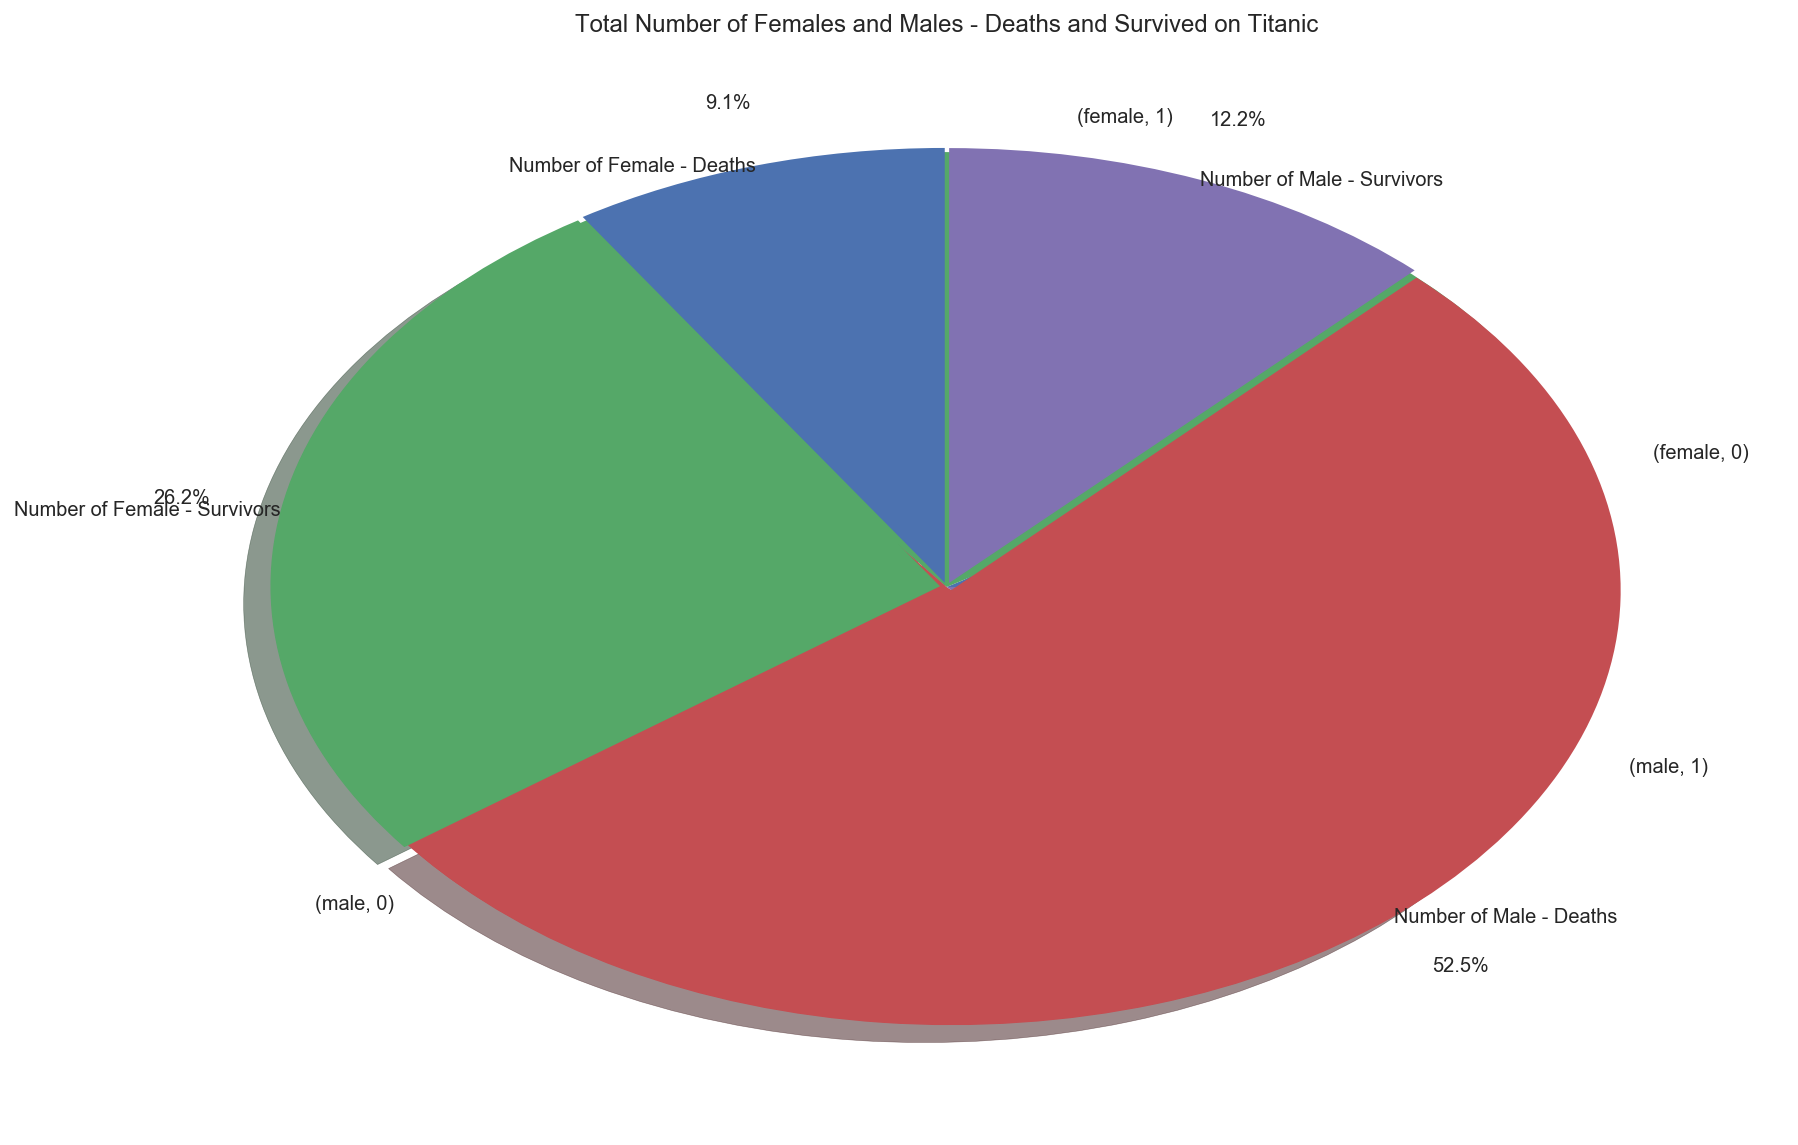

In [34]:
# Plot pie chart for Total Number of Females and Males - Deaths and Survived
survived_male_female.plot(kind = "pie", figsize=(15,10))
labels = 'Number of Female - Deaths', 'Number of Female - Survivors', 'Number of Male - Deaths', 'Number of Male - Survivors'
explode = (0.01, 0.01, 0.01, 0.01)
plt.title("Total Number of Females and Males - Deaths and Survived on Titanic")
plt.ylabel("")
plt.pie(survived_male_female, autopct='%1.1f%%', pctdistance=1.15, labeldistance=1, explode=explode, labels=labels,
        shadow=True, startangle=90)
plt.show()

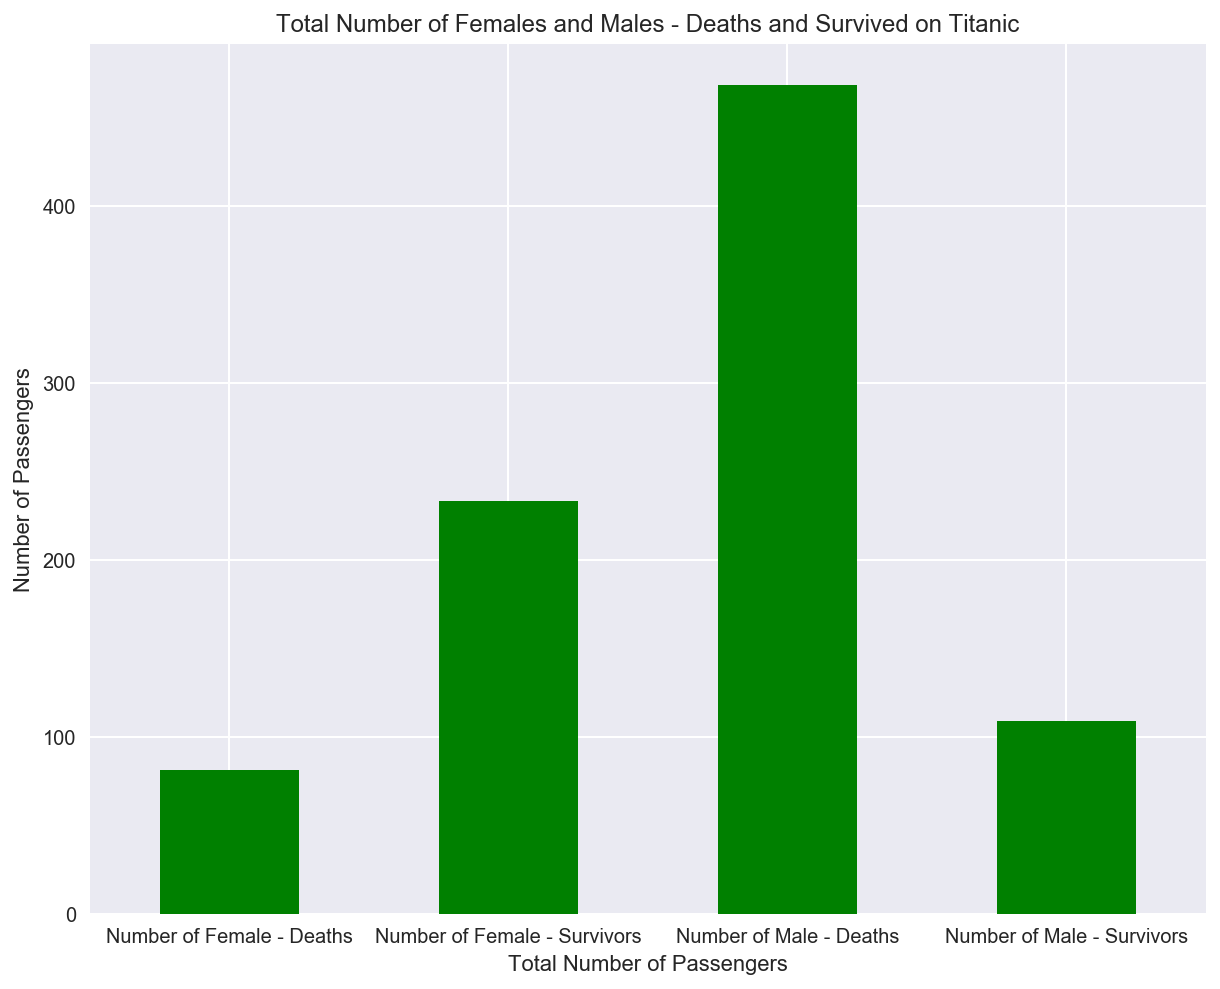

In [35]:
# Plot bar graph for Total Number of Females and Males - Deaths and Survived
objects = ('Number of Female - Deaths', 'Number of Female - Survivors', 'Number of Male - Deaths', 'Number of Male - Survivors')
bars = np.arange(len(objects))
survived_male_female.plot(kind = "bar", figsize = (10,8), color = 'g')
plt.xticks(bars, objects, rotation='horizontal')
plt.ylabel("Number of Passengers")
plt.xlabel("Total Number of Passengers")
plt.title("Total Number of Females and Males - Deaths and Survived on Titanic")
plt.show()

In [36]:
print ("Percent of Female Passengers Survived:\t{}".format((survived_male_female["female"][1]/male_female["female"])*100))
print ("Percent of Male Passengers Survived:\t{}".format((survived_male_female["male"][1]/male_female["male"])*100))

Percent of Female Passengers Survived:	74.20382165605095
Percent of Male Passengers Survived:	18.890814558058924


### Analysis - 
It can be analyzed that 

Percent of Female Passengers Survived:	74.20%

Percent of Male Passengers Survived:	18.89%

### C] Age of Passengers

This section shows the distribution of the age of the passengers.

In [37]:
age_of_passengers = main_file.groupby("Age").size()

In [38]:
age_of_passengers.head()

Age
0.42    1
0.67    1
0.75    2
0.83    2
0.92    1
dtype: int64

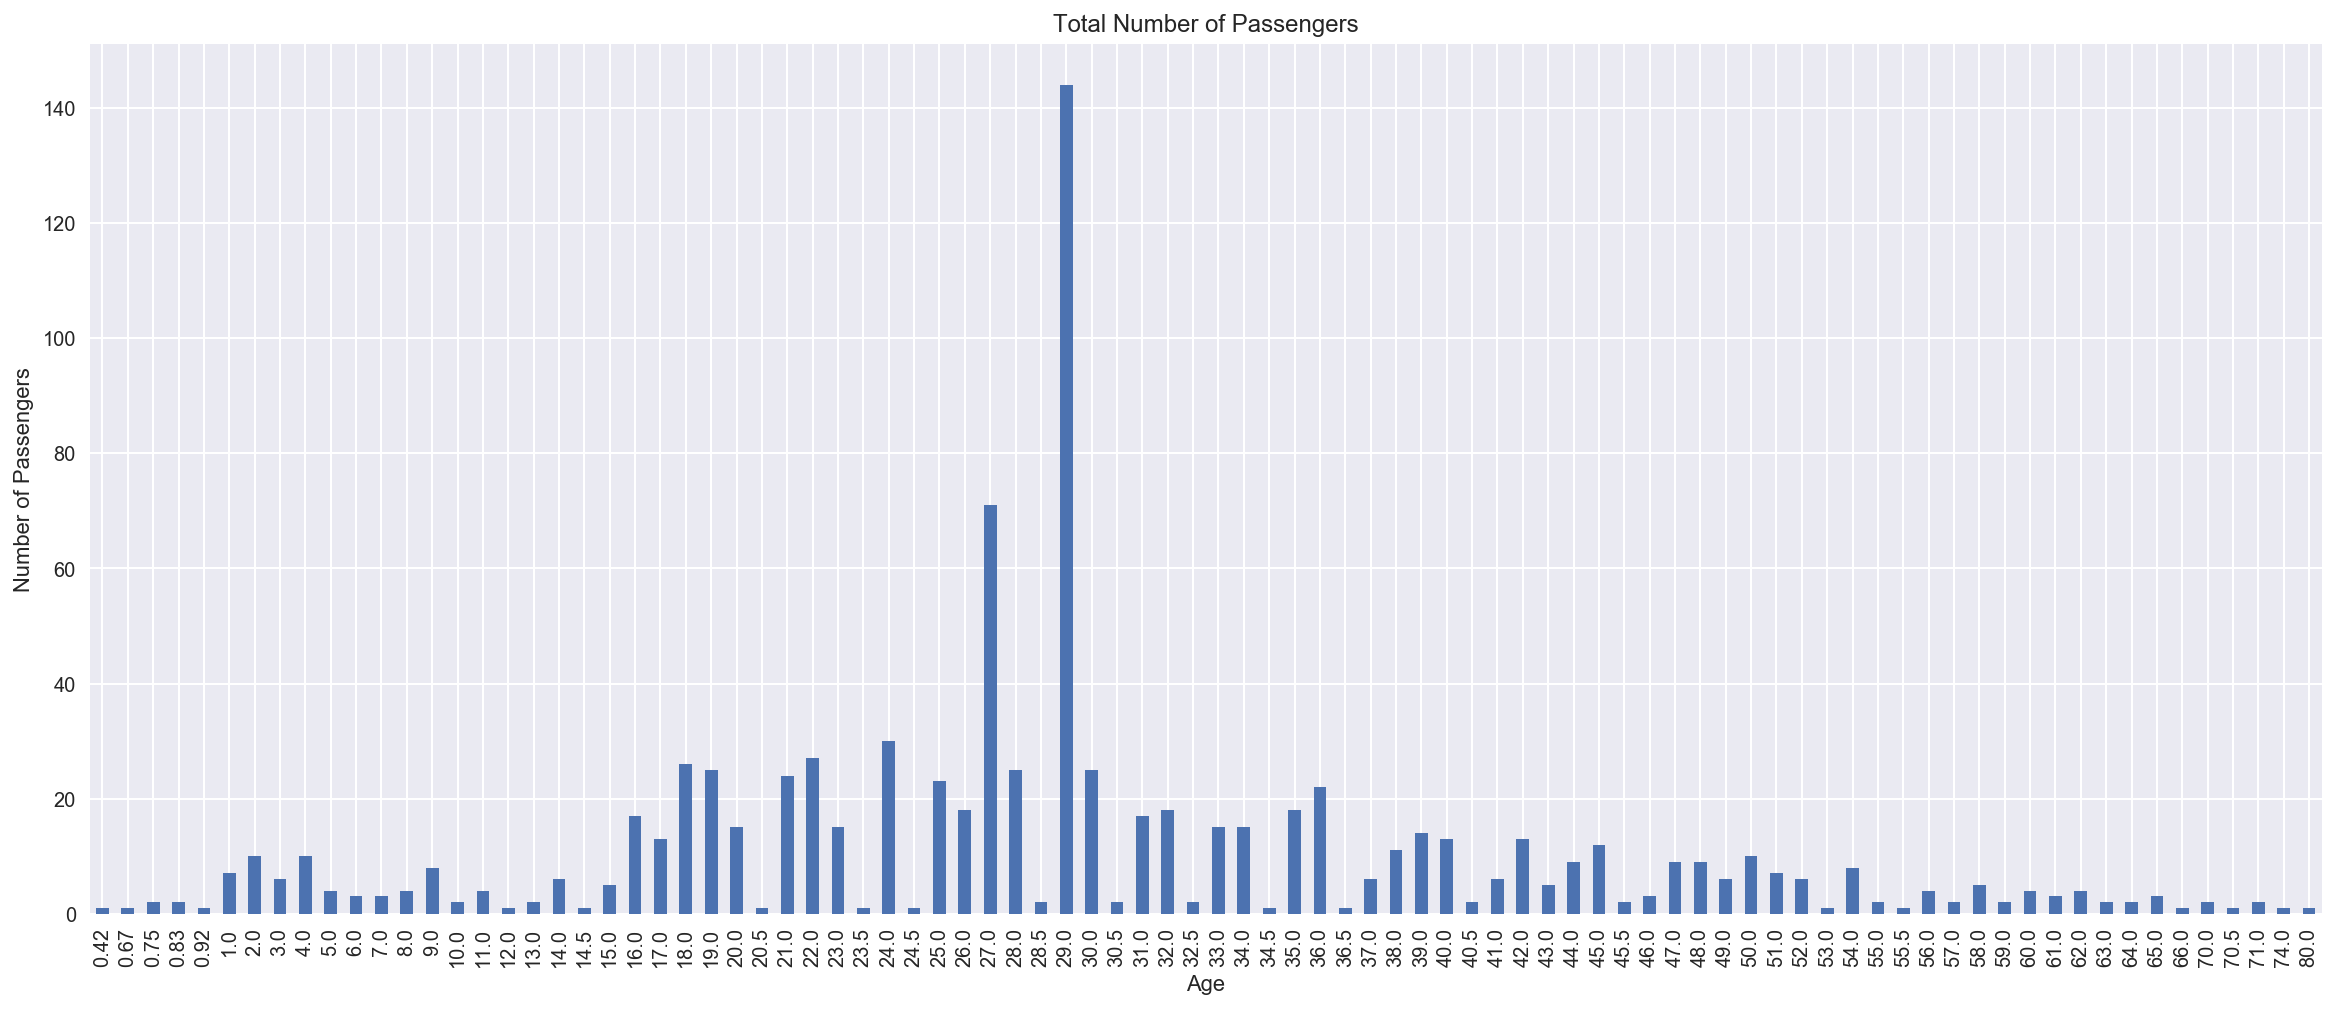

In [39]:
# Plot bar graph for Age of passengers on titanic

age_of_passengers.plot(kind = "bar", figsize = (20,8))
plt.ylabel("Number of Passengers")
plt.xlabel("Age")
plt.title("Total Number of Passengers")
plt.show()

In [40]:
main_file["Age"].describe()

count    891.000000
mean      29.441268
std       13.018747
min        0.420000
25%       22.000000
50%       29.000000
75%       35.000000
max       80.000000
Name: Age, dtype: float64

### Analysis - 
It can be analyzed that 

The Age of Passengers is a Normal Distribution 
with a mean of 29.44. 

### D] Number of Passengers Traveling with their Sibling/Spouse

This section shows a bar plot of Passengers Traveling with their Sibling/Spouse

In [41]:
# Group by Sibling/Spouse Traveling with their Sibling/Spouse
sibsp = main_file.groupby("SibSp").size()

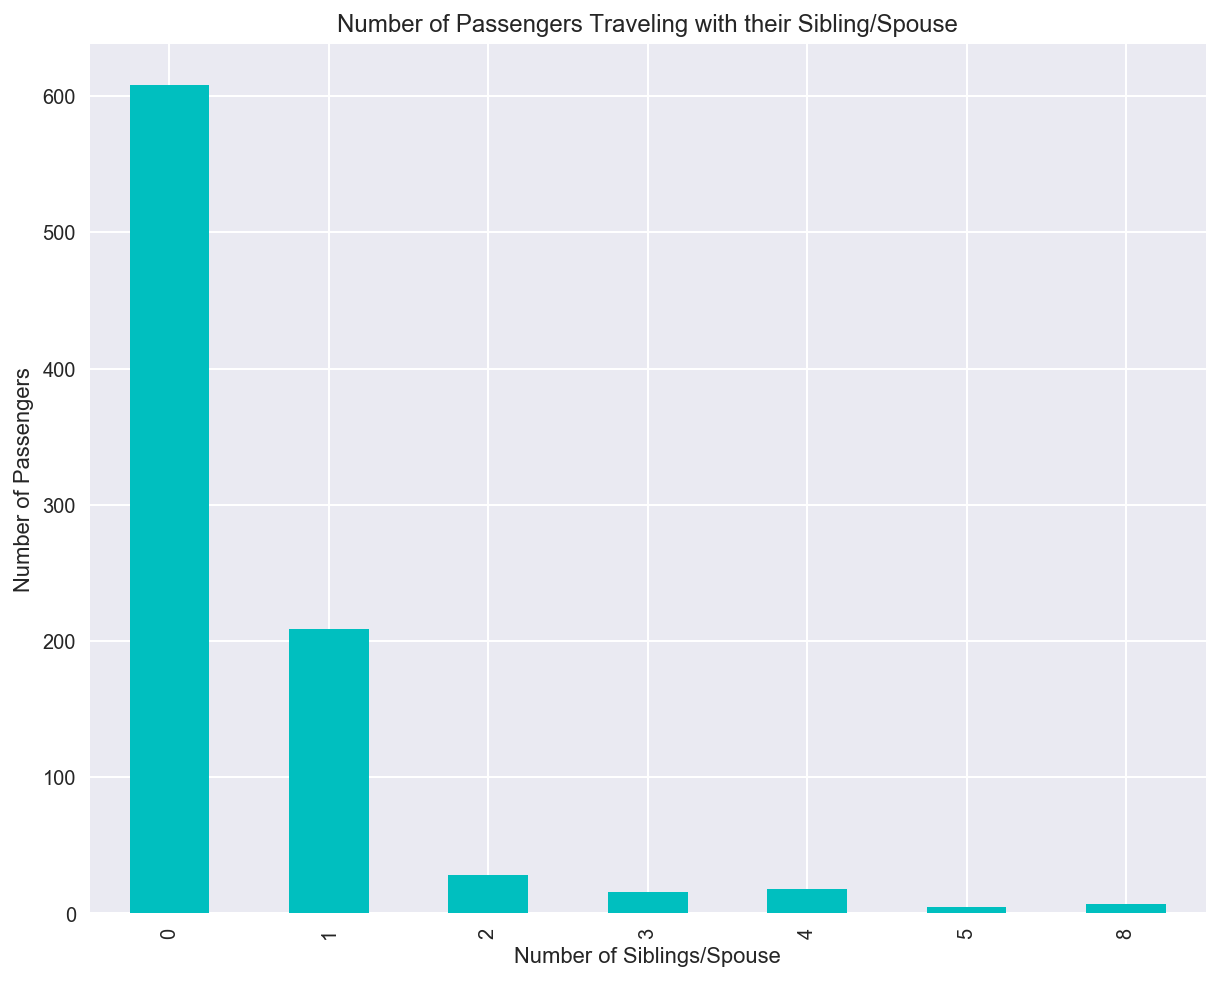

In [42]:
# Plot bar graph for Number of Passengers Traveling with their Sibling/Spouse

sibsp.plot(kind = "bar", figsize = (10,8), color = 'c')
plt.ylabel("Number of Passengers")
plt.xlabel("Number of Siblings/Spouse")
plt.title("Number of Passengers Traveling with their Sibling/Spouse")
plt.show()

### Analysis - 
It can be analyzed that 

Maximum passengers onboard Titanic, were not with their sibling or spouse. 

### E] Number of Passengers traveling with their Parents/Children

This section shows a bar plot of the Number of Passengers traveling with their Parents/Children

In [43]:
# Group data by Passengers traveling with their Parents/Children
parch = main_file.groupby("Parch").size()

In [44]:
parch

Parch
0    678
1    118
2     80
3      5
4      4
5      5
6      1
dtype: int64

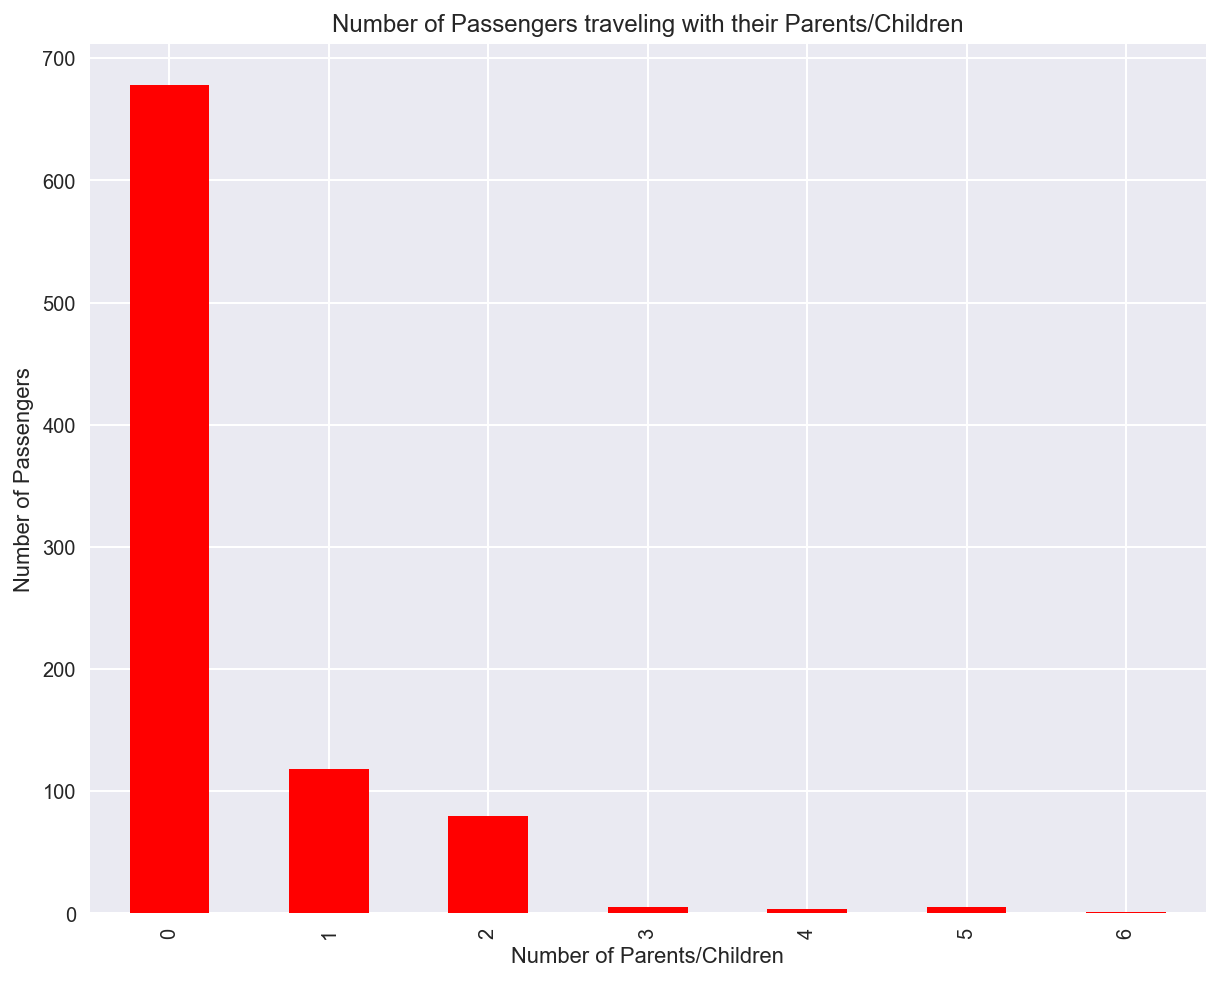

In [45]:
# Bar plot of Number of Passengers traveling with their Parents/Children

parch.plot(kind = "bar", figsize = (10,8), color = 'r')
plt.ylabel("Number of Passengers")
plt.xlabel("Number of Parents/Children")
plt.title("Number of Passengers traveling with their Parents/Children")
plt.show()

### Analysis - 
It can be analyzed that 

Maximum passengers onboard Titanic, were not with their parents or children. 

### F] Number of Passengers Traveling in Different Socio-Economic Classes

In [46]:
# Group data by Number of Passengers Traveling in Different Socio-Economic Classes (Pclass)
pclass = main_file.groupby("Pclass").size()

In [47]:
pclass

Pclass
1    216
2    184
3    491
dtype: int64

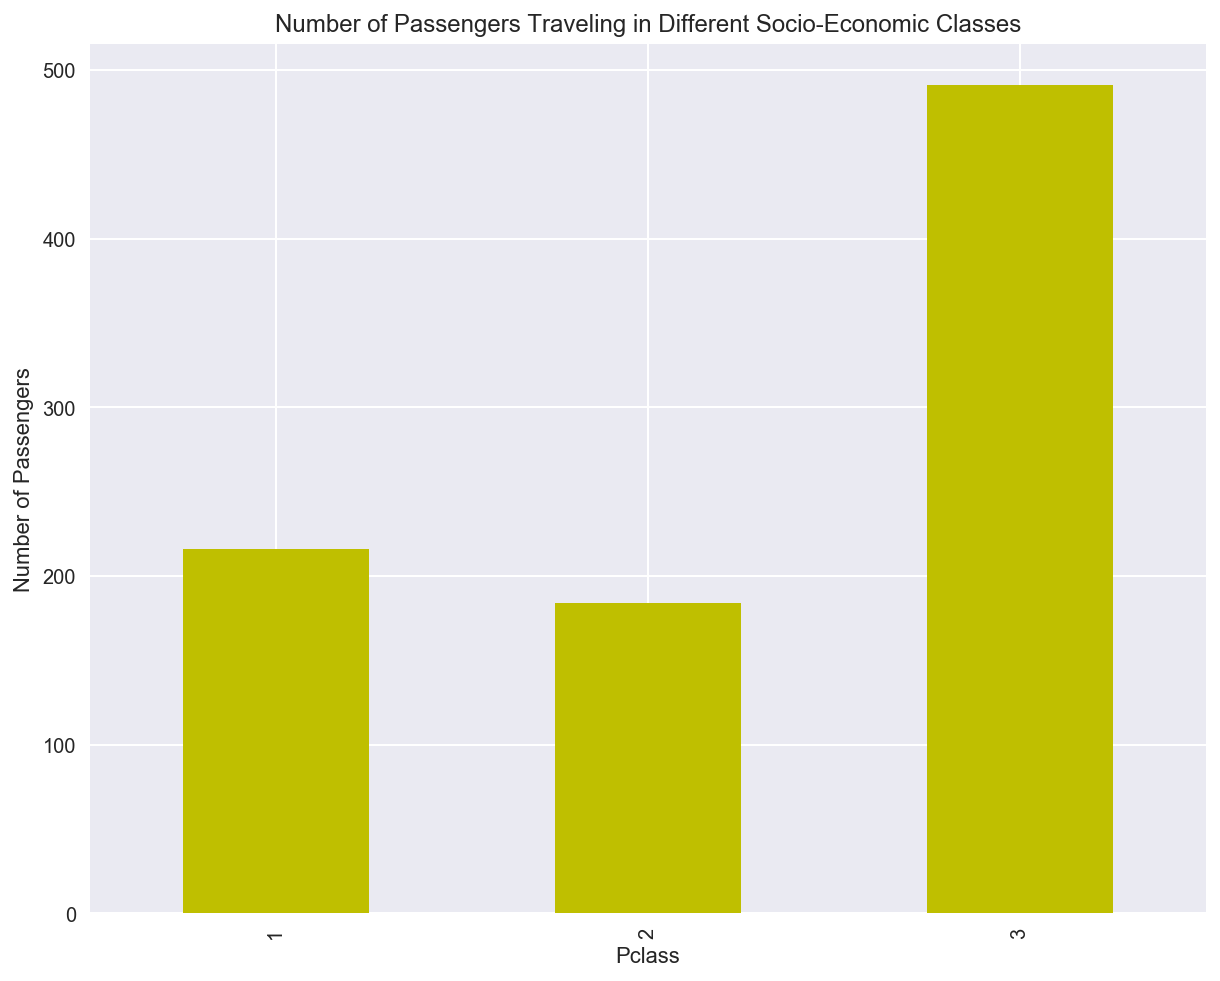

In [48]:
# Bar plot of Number of Passengers Traveling in Different Socio-Economic Classes

pclass.plot(kind = "bar", figsize = (10,8), color = 'y')
plt.ylabel("Number of Passengers")
plt.xlabel("Pclass")
plt.title("Number of Passengers Traveling in Different Socio-Economic Classes")
plt.show()

### Analysis - 
It can be analyzed that 

Majority passengers onboard Titanic, were traveling in Class 3. 

### G] Number of Passengers Traveling in Class 1, 2, 3 - Deaths and Survivors

This section shows a bar plot of the Number of Passengers Traveling in Class 1, 2, 3 - Deaths and Survivors

In [49]:
# Group data by Number of Passengers Traveling in Class 1, 2, 3 - Deaths and Survivors

class_survived = main_file.groupby(["Pclass","Survived"])

In [50]:
class_survived

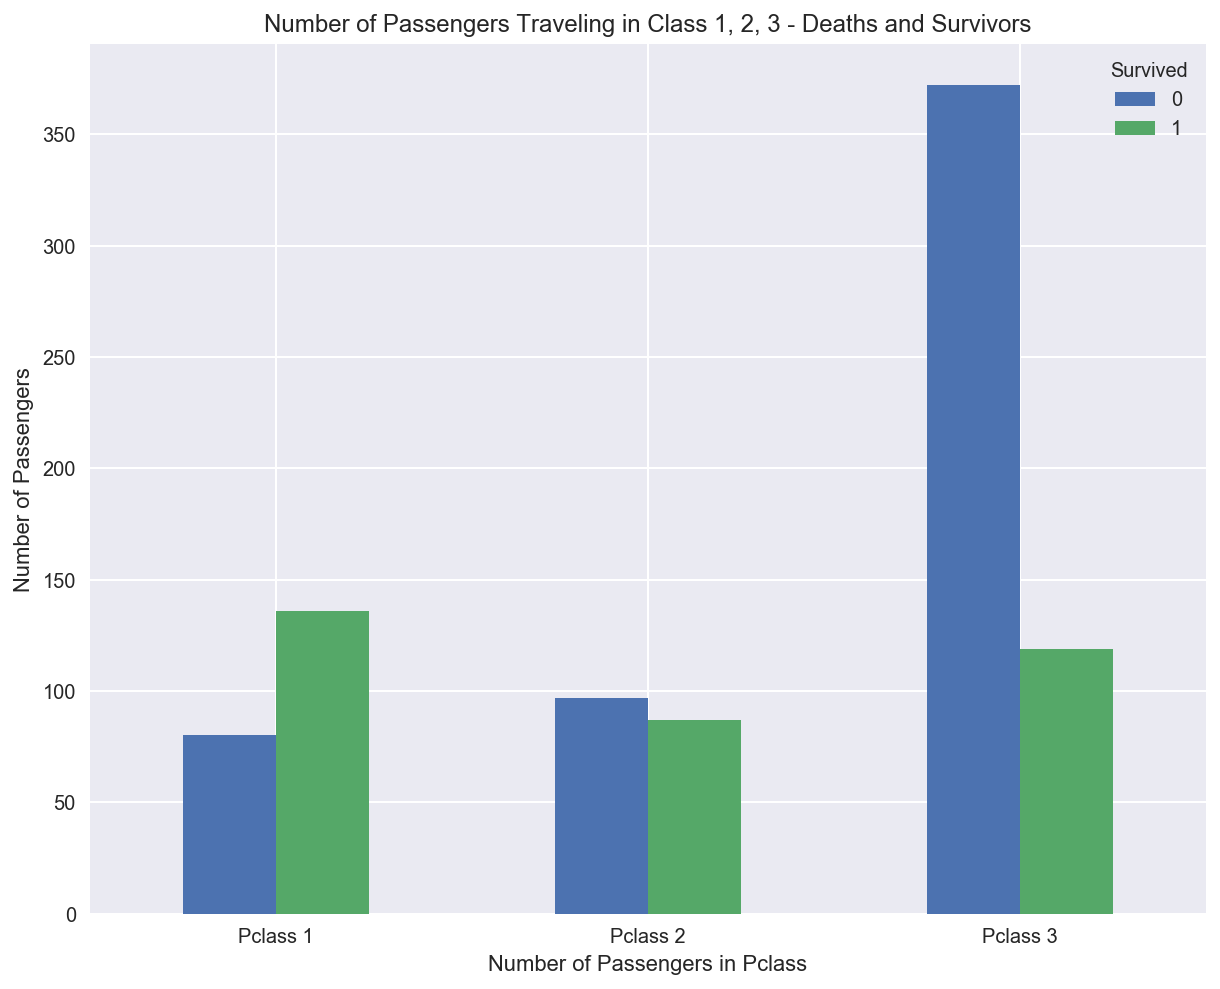

In [51]:
# Bar plot of Number of Passengers Traveling in Class 1, 2, 3 - Deaths and Survivors

objects = ('Pclass 1', 'Pclass 2', 'Pclass 3')
bars = np.arange(len(objects))
class_survived.size().unstack().plot(kind = "bar", figsize = (10,8))
plt.xticks(bars, objects, rotation='horizontal')
plt.ylabel("Number of Passengers")
plt.xlabel("Number of Passengers in Pclass")
plt.title("Number of Passengers Traveling in Class 1, 2, 3 - Deaths and Survivors")
plt.show()

In [52]:
# def bar_chart_per_class(class_titanic):
#     """
#     Produces a bar chart of dead and surviving passengers in the class passed as argument.
#     """
# 
#     objects = ('Number of Deaths', 'Number of Survivors')
#     bars = np.arange(len(objects))
#     class_survived[class_titanic].plot(kind = "bar", figsize = (10,8), color = "m")
#     plt.xticks(bars, objects, rotation='horizontal')
#     plt.ylabel("Number of Passengers")
#     plt.xlabel("Number of Passengers in Class {}".format(class_titanic))
#     plt.title("Number of Passengers Traveling in Class {} - Deaths and Survivors".format(class_titanic))
#     plt.show()
# 
# bar_chart_per_class(1)
# bar_chart_per_class(2)
# bar_chart_per_class(3)

### Analysis - 

Class 1: 
Deaths - 37%
Survived - 63%

Class 2:
Deaths - 53%
Survived - 47%

Class 3:
Deaths - 76%
Survived - 24%

It can be analyzed that about 76% passengers have died from Class 3 and this percentage is much more than that the passenger deaths from Class 1 and Class 2.

### H] Distribution of Pclass and Cabin

This section shows the Distribution of Pclass and Cabin

In [53]:
# Group data by Pclass and Cabin

pclass_cabin = main_file.groupby(("Pclass", "Cabin")).size()

In [54]:
# Describe how the grouped data looks
pclass_cabin.describe()

count    147.000000
mean       1.387755
std        0.656360
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        4.000000
dtype: float64

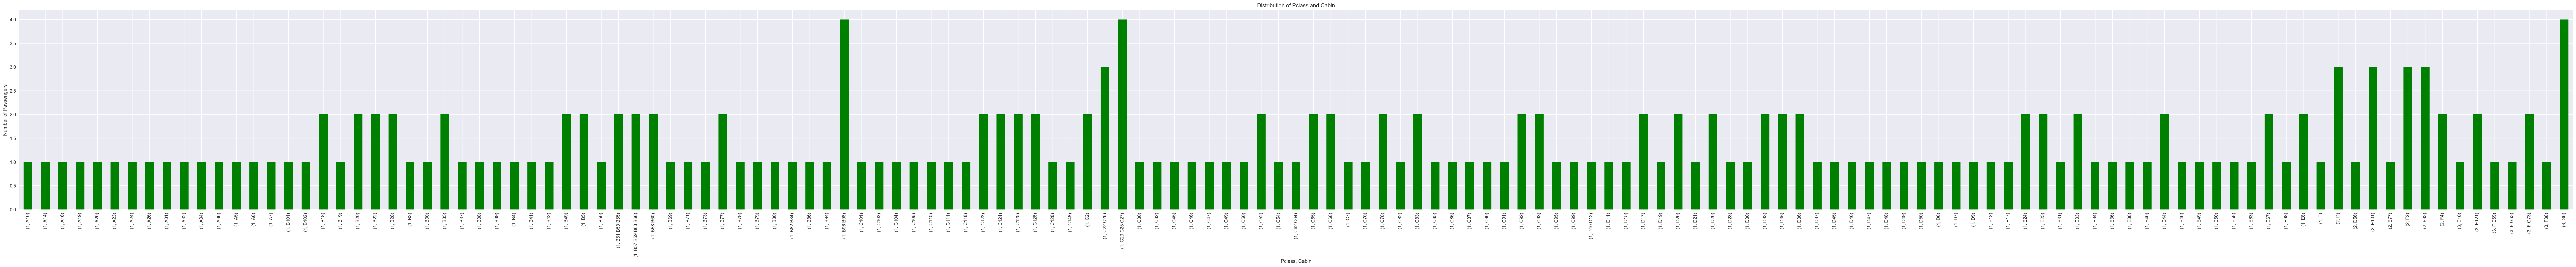

In [55]:
# Bar plot Distribution of Pclass and Cabin Passengers traveling on titanic

pclass_cabin.plot(kind = "bar", figsize = (100,8), color = 'g')
plt.ylabel("Number of Passengers")
plt.xlabel("Pclass, Cabin")
plt.title("Distribution of Pclass and Cabin")
plt.show()

### Analysis - 

This just shows a general distribution of how the passengers were distributed based on Pclass and Cabin

### I] Box Plot of Survivors from Pclass v/s Fare

This sections shows a Box Plot of Survivors from Pclass v/s Fare

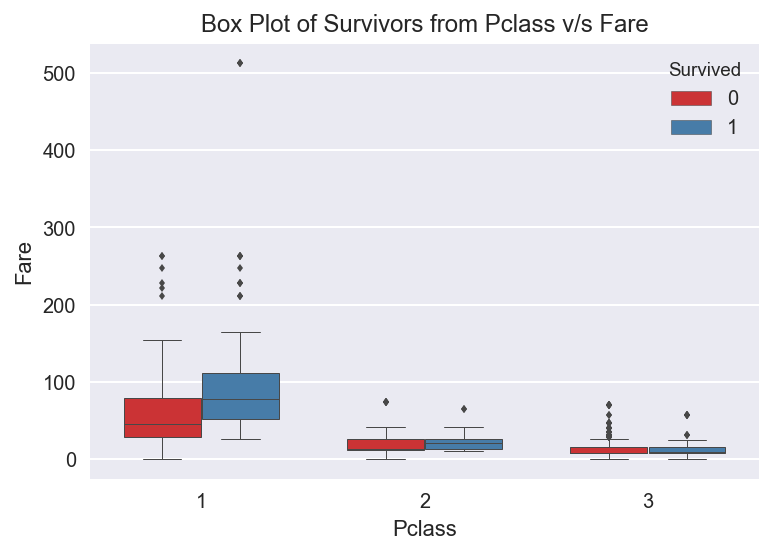

In [56]:
# Box Plot of Survivors from Pclass v/s Fare

ax = sns.boxplot(x = "Pclass", y = "Fare", hue = "Survived", data = main_file, palette = "Set1", width = 0.7, fliersize = 3, whis = 1.5, linewidth = 0.5) 
plt.title("Box Plot of Survivors from Pclass v/s Fare")
sns.plt.show()

### Analysis - 

It can be analyzed that passengers who paid more fare and are from Pclass 3 have more survivors. 

### J] Distribution of Survivors with respect to Embarkment

This section shows the Distribution of Survivors with respect to Embarkment

In [57]:
# Group data by Embarkment 

embark_survived = main_file.groupby(("Embarked", "Survived")).size()

In [58]:
embark_survived

Embarked  Survived
C         0            75
          1            93
Q         0            47
          1            30
S         0           427
          1           217
dtype: int64

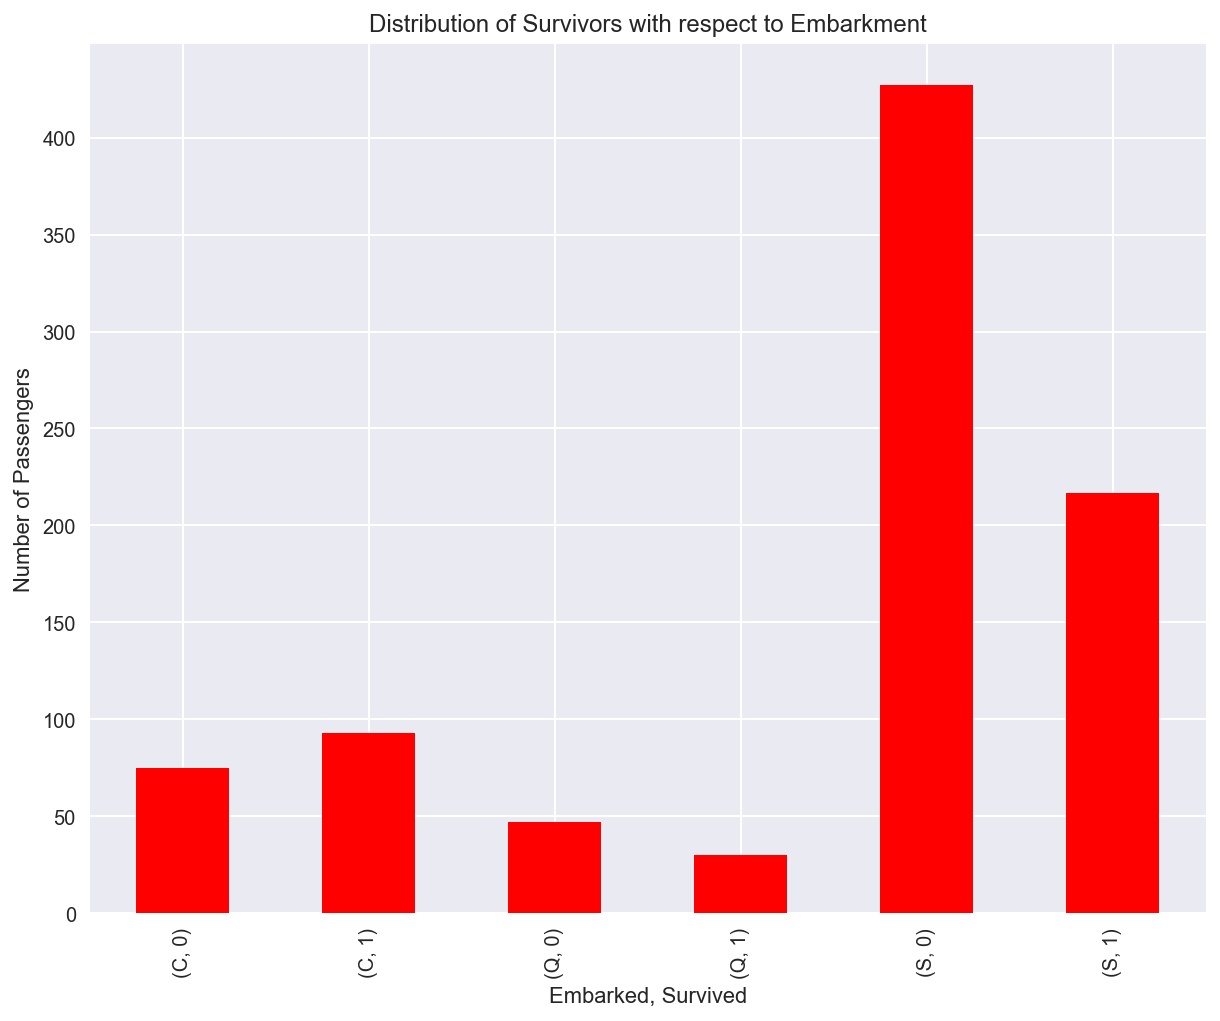

In [59]:
# Bar plot of Distribution of Survivors with respect to Embarkment

embark_survived.plot(kind = "bar", figsize = (10,8), color = "r")
plt.ylabel("Number of Passengers")
plt.xlabel("Embarked, Survived")
plt.title("Distribution of Survivors with respect to Embarkment")
plt.show()

### Analysis - 

It can be analyzed that passengers who embarked from Port of Embarkment: C, have more percentage in survivors than compared to Q and S.

### K] Number of Passengers that Died and Survived with respect to the Fare

This section shows a box plot of Number of Passengers that Died and Survived with respect to the Fare

In [60]:
# Group data by Survived and Fare

fare_survived = main_file.groupby(("Survived", "Fare")).size()

In [61]:
fare_survived.head()

Survived  Fare  
0         0.0000    14
          4.0125     1
          5.0000     1
          6.2375     1
          6.4375     1
dtype: int64

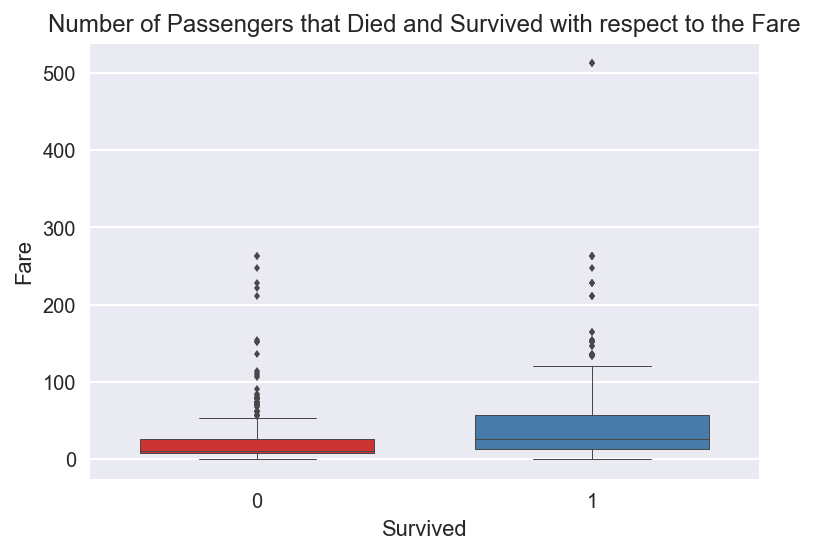

In [62]:
# Box plot of Number of Passengers that Died and Survived with respect to the Fare

ax = sns.boxplot(x = "Survived", y = "Fare",data = main_file, palette = "Set1", width = 0.7, fliersize = 3, whis = 1.5, linewidth = 0.5) 
plt.title("Number of Passengers that Died and Survived with respect to the Fare")
sns.plt.show()

### Analysis - 

It can be analyzed that the percantge of survival is more for the passengers who paid higher fares.

## L] Distribution of Deck (Cabin) and Survived

This section shows a bar plot Distribution of Deck (Cabin) and Survived.

Here, the Deck from the Cabin column from the original titanic dataset is extracted to show the Deck of Cabin. 

In [63]:
# Group data by Cabin
cabin = main_file.groupby("Cabin").size()

In [64]:
# Creating new Cabin_Deck by extracting first letter from Cabin column of original dataset

main_file["Cabin_Deck"] = main_file["Cabin"].astype(str).str[0]

In [65]:
cabin_deck = main_file.groupby("Cabin_Deck").size()

In [66]:
cabin_deck

Cabin_Deck
A     15
B     47
C     59
D     33
E     32
F     13
G      4
T      1
n    687
dtype: int64

In [67]:
cabin_deck_survived = main_file.groupby(("Cabin_Deck", "Survived")).size()

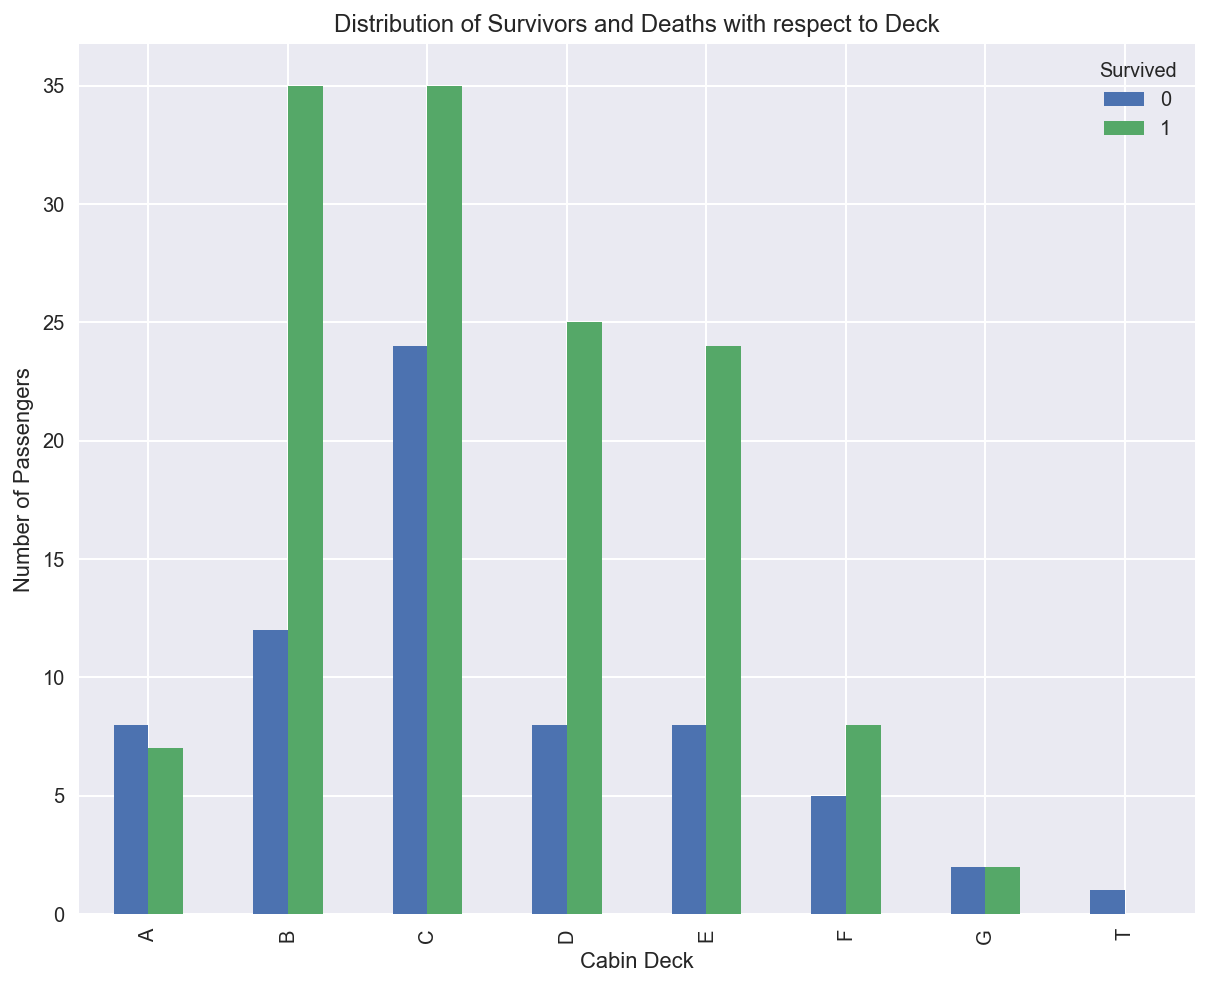

In [68]:
# Bar plot Distribution of Deck (Cabin) and Survived

cabin_deck_survived.drop("n").unstack().plot(kind = "bar", figsize = (10,8))
plt.ylabel("Number of Passengers")
plt.xlabel("Cabin Deck")
plt.title("Distribution of Survivors and Deaths with respect to Deck")
plt.show()

### Analysis - 

Here, the deck is extracted from the Cabin column of the original titanic dataset.

As shown above, there are 687 null values out of 891 data values. 

I dropped the Null Values and plotted the left out values of the deck. 

Hence, this distribution is not very accurate as 77% of the value are null.

The above count plot shows the number of passengers with a deck assignment by passenger class. You can see that the majority of passengers with available deck assignments are first class passengers.

It also clearly shows that an overwhelming majority of second and third class had no known Deck assignment. This could possibly be because second and third class passengers really did not have a staff to service them; this the Titanic really didn't need to know where their cabin was located.

## 5. Prediction Algorithms

### A] Make data appropriate for Training and Testing

In [69]:
# Only keep title from Name column

Title = []

for i in main_file["Name"]:
    Title.append(i.split(",")[1].split(".")[0])

In [70]:
main_file["Name"] = Title

In [71]:
main_file["Name"].head()

0       Mr
1      Mrs
2     Miss
3      Mrs
4       Mr
Name: Name, dtype: object

In [72]:
# Delete columns that will not be necessary for prediction algorithms

In [73]:
del main_file["PassengerId"]

In [74]:
del main_file["Ticket"]

In [75]:
del main_file["Cabin"]

In [76]:
main_file.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Cabin_Deck
0,0,3,Mr,male,22.0,1,0,7.2500,S,n
1,1,1,Mrs,female,38.0,1,0,71.2833,C,C
2,1,3,Miss,female,26.0,0,0,7.9250,S,n
3,1,1,Mrs,female,35.0,1,0,53.1000,S,C
4,0,3,Mr,male,35.0,0,0,8.0500,S,n


In [77]:
# Convert string values to int values for the ease of prediction
main_file = pd.get_dummies(main_file)

In [78]:
main_file.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Name_ Capt,Name_ Col,Name_ Don,Name_ Dr,...,Embarked_S,Cabin_Deck_A,Cabin_Deck_B,Cabin_Deck_C,Cabin_Deck_D,Cabin_Deck_E,Cabin_Deck_F,Cabin_Deck_G,Cabin_Deck_T,Cabin_Deck_n
0,0,3,22.0,1,0,7.2500,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
1,1,1,38.0,1,0,71.2833,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
4,0,3,35.0,0,0,8.0500,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1


In [79]:
# View data - ready for training and testing
pd.isnull(main_file).sum()

Survived              0
Pclass                0
Age                   0
SibSp                 0
Parch                 0
Fare                  0
Name_ Capt            0
Name_ Col             0
Name_ Don             0
Name_ Dr              0
Name_ Jonkheer        0
Name_ Lady            0
Name_ Major           0
Name_ Master          0
Name_ Miss            0
Name_ Mlle            0
Name_ Mme             0
Name_ Mr              0
Name_ Mrs             0
Name_ Ms              0
Name_ Rev             0
Name_ Sir             0
Name_ the Countess    0
Sex_female            0
Sex_male              0
Embarked_C            0
Embarked_Q            0
Embarked_S            0
Cabin_Deck_A          0
Cabin_Deck_B          0
Cabin_Deck_C          0
Cabin_Deck_D          0
Cabin_Deck_E          0
Cabin_Deck_F          0
Cabin_Deck_G          0
Cabin_Deck_T          0
Cabin_Deck_n          0
dtype: int64

### B] Splitting up data into 80% train data and 20% test data

This section splits up the fixed titanic data into 80% train data and 20% test data, to perform prediction algorithms on it. 

In [80]:
# Split data into 80 - 20 
X = main_file.iloc[:,1:]
Y = main_file["Survived"]
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size = 0.2)

In [81]:
# Check length of train and test data

In [82]:
len(X_train)

712

In [83]:
len(X_test)

179

In [84]:
len(Y_train)

712

In [85]:
len(Y_test)

179

### C] Random Forest Classification Algorithm - Implementation and Results

In [86]:
# Random Forest Classification Algorithm applied to train data
RF = RandomForestClassifier(n_jobs = 2)
RF.fit(X_train, Y_train)
RF.score(X_train, Y_train)

0.9662921348314607

In [87]:
# Predict Random Forest Algorithm on Test Data
predictions_RF = RF.predict(X_test)

In [88]:
# Print Accuracy Score for Random Forest Algorithm
print("Accuracy Score is: ")
print(accuracy_score(Y_test, predictions_RF))
print()

Accuracy Score is: 
0.787709497207



In [89]:
# Classification Report of Prediction
print("Classification Report: ")
print(classification_report(Y_test, predictions_RF))

Classification Report: 
             precision    recall  f1-score   support

          0       0.76      0.90      0.83       101
          1       0.83      0.64      0.72        78

avg / total       0.79      0.79      0.78       179



In [90]:
# Confusion Matrix for predictions made
conf = confusion_matrix(Y_test, predictions_RF)
conf

array([[91, 10],
       [28, 50]])

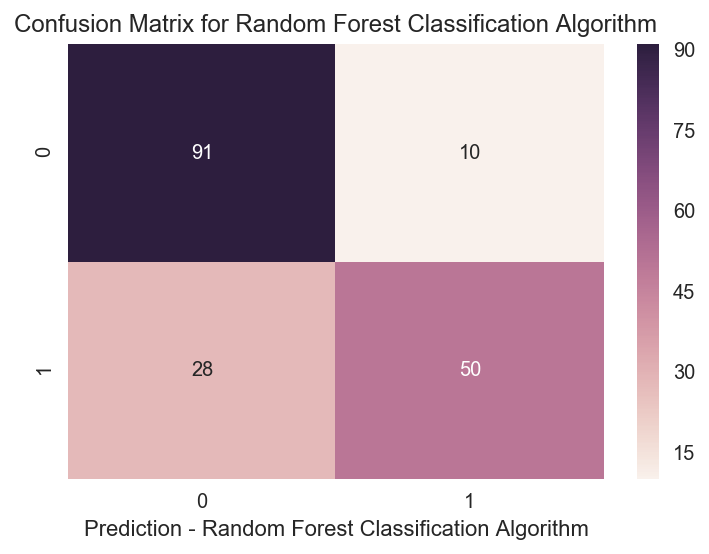

In [91]:
# Plot Confusion Matrix for Random Forest Classification Algorithm
label = ["0", "1"]
sns.heatmap(conf, annot = True, xticklabels = label, yticklabels = label)
plt.xlabel("Prediction - Random Forest Classification Algorithm")
plt.title("Confusion Matrix for Random Forest Classification Algorithm")
plt.show()

### Inferences, Oberservations, Conclusions for Random Forest Classification Algorithm:

Random Forest is useful for both Classification and Regression!

Also, it will create a multitude of (generally very poor) trees for the data set using different random subsets of the input variables, and will return whichever prediction was returned by the most trees. 


This helps to avoid “overfitting”, a problem that occurs when a model is so tightly fitted to arbitrary correlations in the training data that it performs poorly on test data.

### D] Linear Discrimination Analysis - Implementation and Results

In [92]:
# LDA applied to train data
lda = LinearDiscriminantAnalysis()
lda.fit(X_train,Y_train)
predictions_lda = lda.predict(X_test)

/Users/Utsav/Projects/Anaconda/anaconda/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


In [93]:
# Print Accuracy Score for LDA
print("Accuracy Score is:")
print(accuracy_score(Y_test, predictions_lda))
print()

Accuracy Score is:
0.821229050279



In [94]:
# Classification Report of Prediction
print("Classification Report:")
print(classification_report(Y_test, predictions_lda))

Classification Report:
             precision    recall  f1-score   support

          0       0.82      0.87      0.85       101
          1       0.82      0.76      0.79        78

avg / total       0.82      0.82      0.82       179



In [95]:
# Confusion Matrix for predictions made
conf2 = confusion_matrix(Y_test,predictions_lda)
conf2

array([[88, 13],
       [19, 59]])

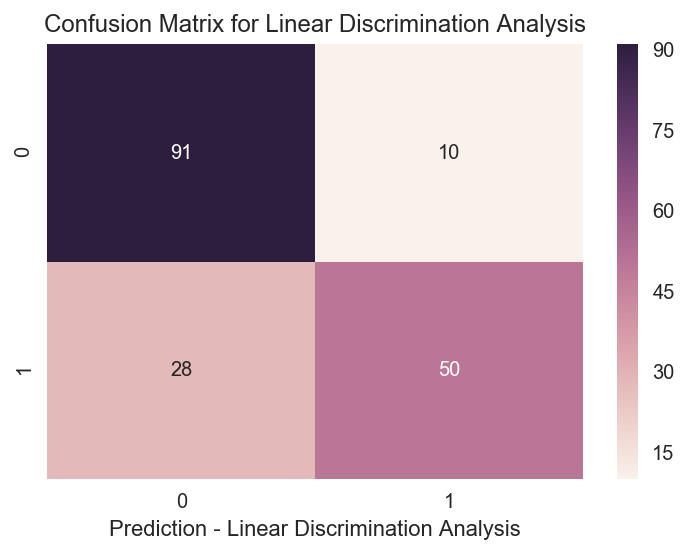

In [96]:
# Plot Confusion Matrix for Linear Discrimination Analysis
label = ["0","1"]
sns.heatmap(conf, annot=True, xticklabels=label, yticklabels=label)
plt.xlabel("Prediction - Linear Discrimination Analysis")
plt.title("Confusion Matrix for Linear Discrimination Analysis")
plt.show()

### Inferences, Oberservations, Conclusions for Linear Discrimination Analysis:

In the dataset we find that the independent variables are not normally distributed, which is the fundamental assumption while using LDA.

Moreover, by using LDA we find that it offers a better accuracy and recall, when compared to Random Forest.

## 6] Further Research

The deck data values have 77% null values and there is scope to fix these data points. 

## 7] Conclusion

Even though the data analysis, visualization and predictions have been done accurately, there still lies the limitation of the dataset. The difference between the sample and the population, we don't know how the sample was chosen from the actual population of people that were on the Titanic. There could have been some sort of intentional or unintentional bias in how the sample was selected.